
# Toronto Building Permits (TBP) Analysis

This notebook analyzes the Toronto Building Permits dataset.  
It covers data loading, cleaning, visualization, and anomaly detection using machine learning.

---


In [1]:

# Import necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.ensemble import IsolationForest
from scipy import stats

# Set visualization styles
sns.set(style="whitegrid", palette="muted", font_scale=1.1)
plt.rcParams["figure.figsize"] = (10, 6)


## 1. Data Loading

In [2]:

# Load dataset
df = pd.read_csv("./excel_work-data/Toronto Building Permits.csv")
print("Dataset Shape:", df.shape)
df.head()


Dataset Shape: (32577, 30)


,PERMIT_NUM,REVISION_NUM,PERMIT_TYPE,STRUCTURE_TYPE,WORK,STREET_NUM,STREET_NAME,STREET_TYPE,STREET_DIRECTION,POSTAL,...,DWELLING_UNITS_LOST,EST_CONST_COST,ASSEMBLY,INSTITUTIONAL,RESIDENTIAL,BUSINESS_AND_PERSONAL_SERVICES,MERCANTILE,INDUSTRIAL,INTERIOR_ALTERATIONS,DEMOLITION
0,00 119016 000,0,Residential Building Permit,SFD/Detached,New Building,548,BROOKDALE,AVE,,M5M,...,NaN,300000,0.0,0.0,285.40,0.0,0.0,0.0,0.0,0.0
1,00 123861 PLB,0,Plumbing(PS),Warehouse,Install/Alter Plumbing - only,885,LOGAN,AVE,,M4K,...,NaN,3000,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0.0
2,00 124060 CMB,0,Residential Building Permit,SFD - Detached,New Building,361,JOICEY,BLVD,,M5M,...,NaN,"250,000",0.0,0.0,270.92,0.0,0.0,0.0,0.0,0.0
3,00 125516 CMB,2,Non-Residential Building Permit,Mixed Industrial Use,Alteration to Existing Building,2,WICKMAN,RD,,,...,NaN,10000,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0.0
4,00 125516 CMB,0,Non-Residential Building Permit,Exterior Storage Tank,Alteration to Existing Building,2,WICKMAN,RD,,,...,NaN,100000,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0.0


## 2. Missing Values Analysis

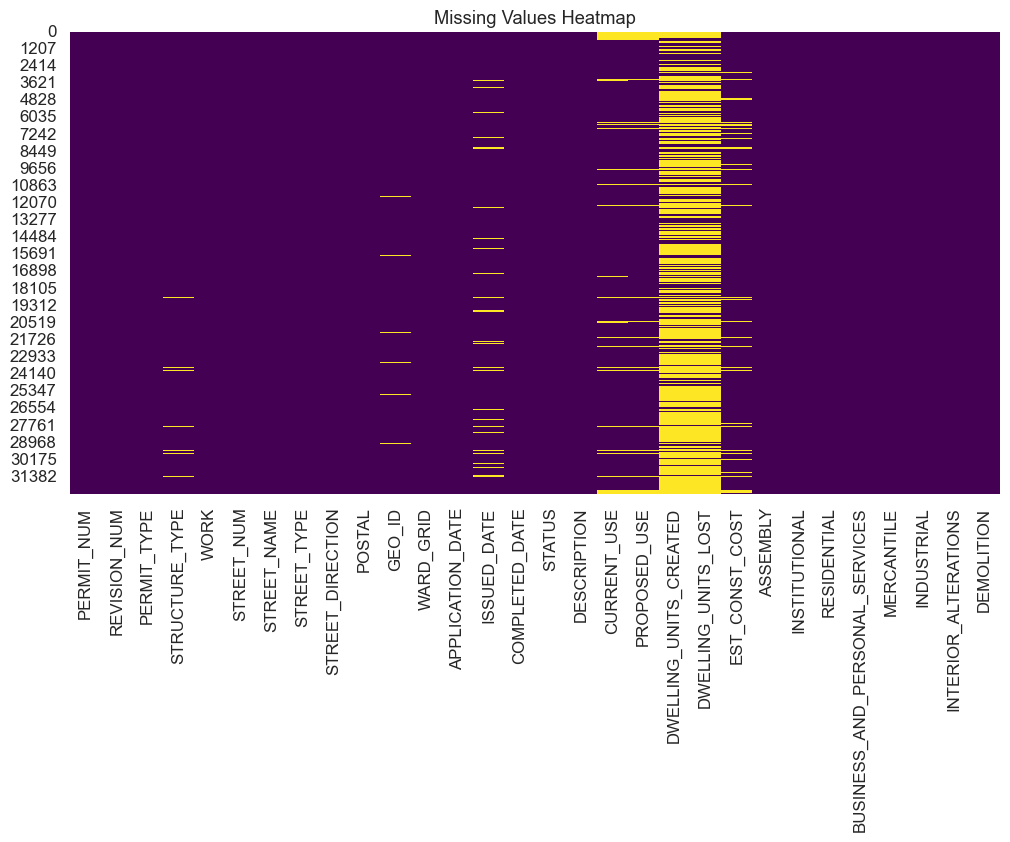

DWELLING_UNITS_LOST       22169
DWELLING_UNITS_CREATED    22134
EST_CONST_COST             2008
CURRENT_USE                1986
PROPOSED_USE               1772
ISSUED_DATE                1688
GEO_ID                      507
STRUCTURE_TYPE              181
DESCRIPTION                  34
WORK                          3
dtype: int64

In [3]:

# Visualize missing values
plt.figure(figsize=(12, 6))
sns.heatmap(df.isnull(), cmap="viridis", cbar=False)
plt.title("Missing Values Heatmap")
plt.show()

# Count missing values per column
df.isnull().sum().sort_values(ascending=False).head(10)


## 3. Data Cleaning

In [4]:

# Fill missing values with 0 (simple strategy for now)
df_cleaned = df.fillna(0)

# Verify cleaning
print("Any missing values left?", df_cleaned.isnull().values.any())


Any missing values left? False


## 4. Exploratory Data Analysis (EDA)

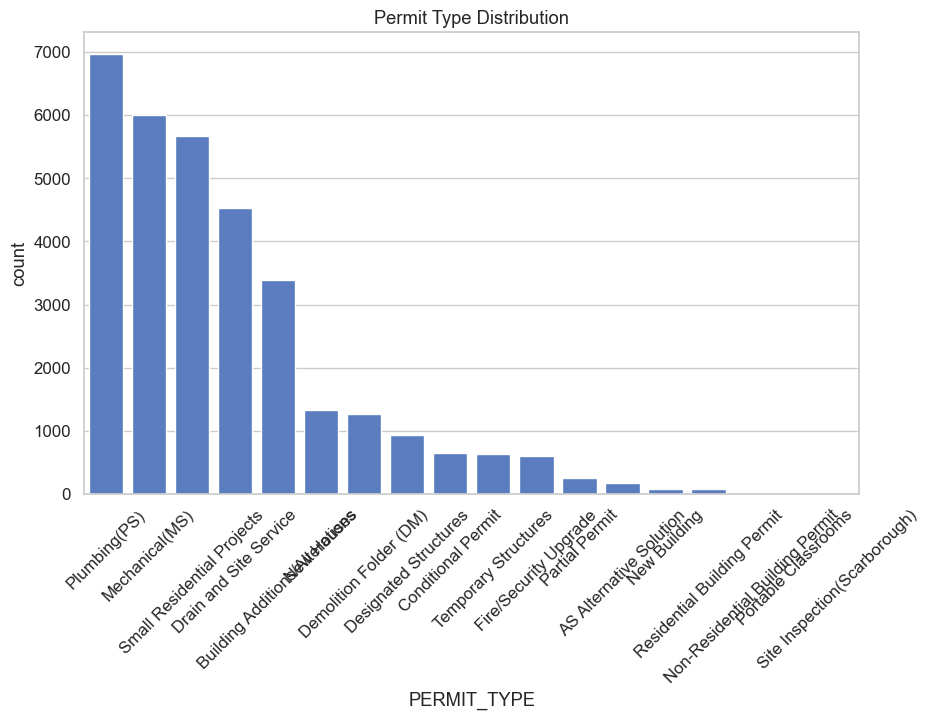

In [6]:

# Permit type distribution
sns.countplot(data=df_cleaned, x="PERMIT_TYPE", order=df_cleaned["PERMIT_TYPE"].value_counts().index)
plt.xticks(rotation=45)
plt.title("Permit Type Distribution")
plt.show()


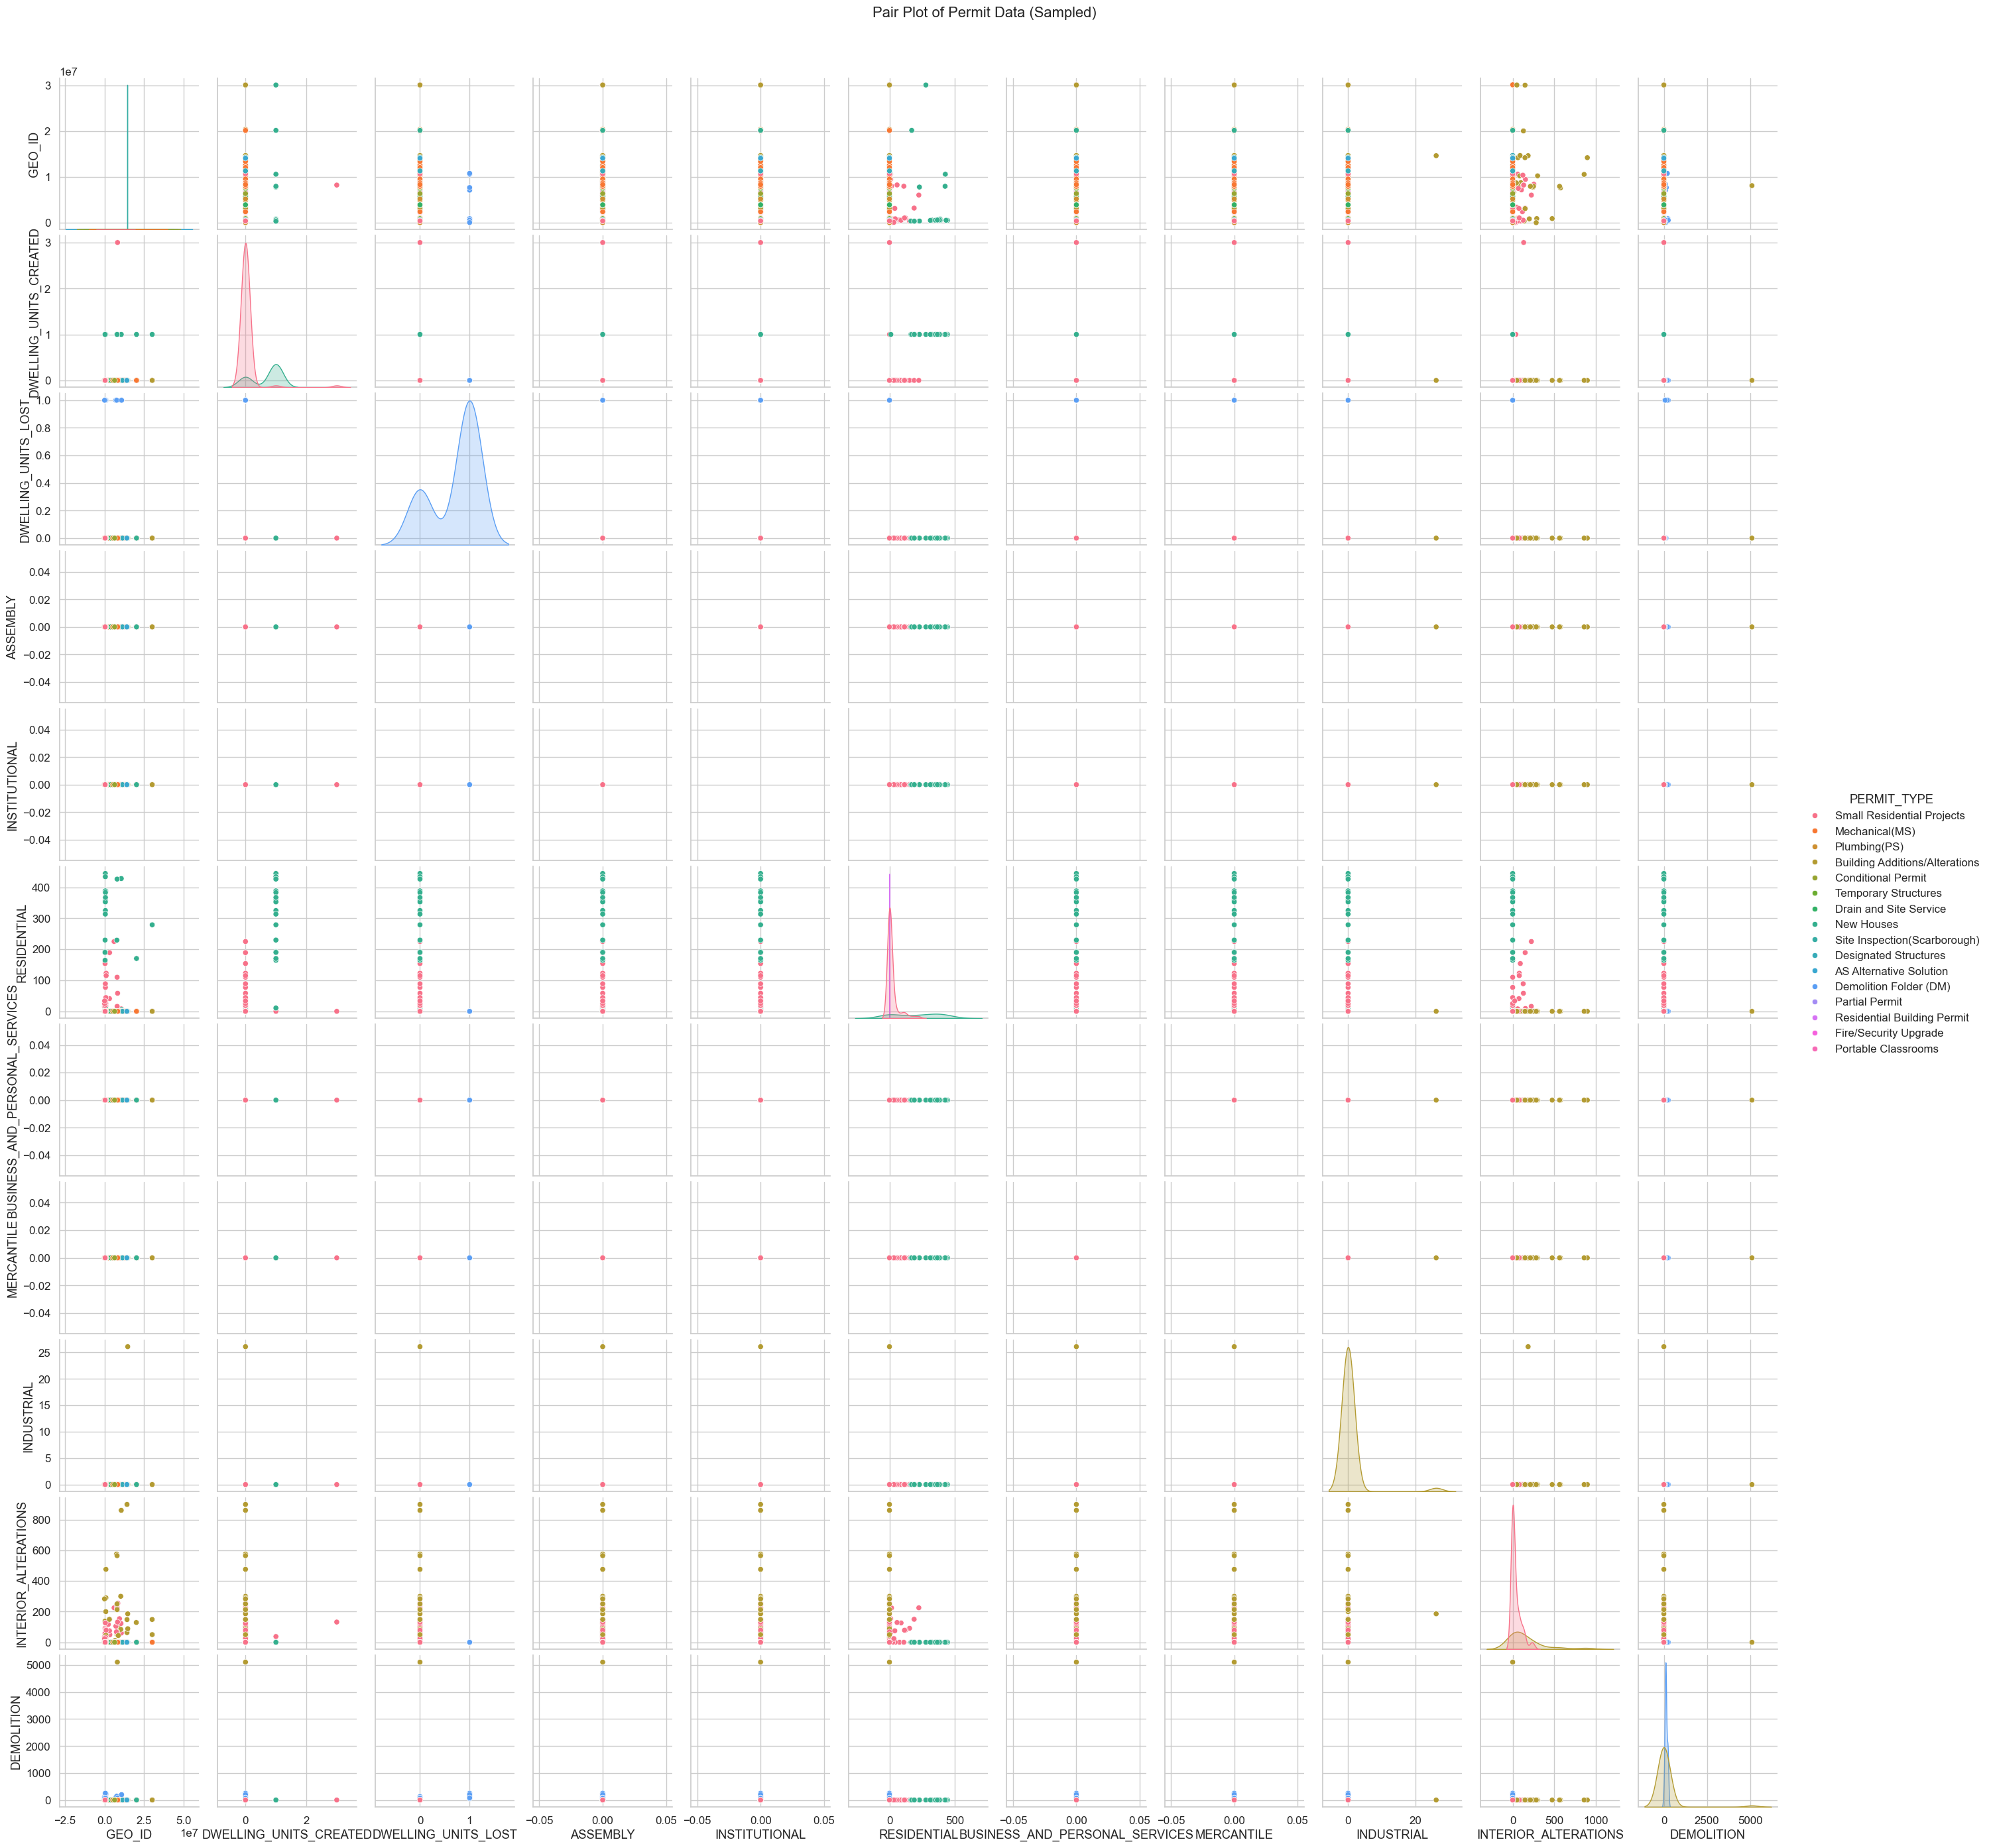

In [7]:

# Pair plot (sample for performance)
sns.pairplot(df_cleaned.sample(500), hue="PERMIT_TYPE", diag_kind="kde")
plt.suptitle("Pair Plot of Permit Data (Sampled)", y=1.02)
plt.show()


## 5. Outlier & Anomaly Detection

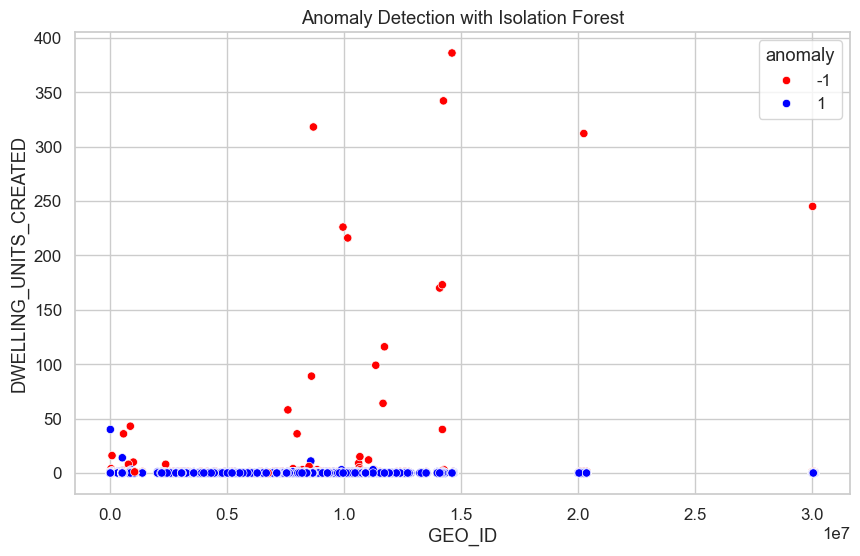

anomaly
 1    30948
-1     1629
Name: count, dtype: int64

In [8]:

# Select numeric features for anomaly detection
numeric_cols = df_cleaned.select_dtypes(include=[np.number]).columns
X = df_cleaned[numeric_cols]

# Isolation Forest model
iso_forest = IsolationForest(contamination=0.05, random_state=42)
df_cleaned["anomaly"] = iso_forest.fit_predict(X)

# Visualize anomalies
sns.scatterplot(data=df_cleaned, x=numeric_cols[0], y=numeric_cols[1], hue="anomaly", palette={1:"blue",-1:"red"})
plt.title("Anomaly Detection with Isolation Forest")
plt.show()

# Anomaly counts
df_cleaned["anomaly"].value_counts()


## 6. Future Improvements

- Use clustering (DBSCAN, KMeans) for better anomaly grouping.
- Add temporal & geospatial analysis (year, neighborhood).
- Build interactive dashboards with Plotly/Dash.
- Compare multiple anomaly detection methods.
- Convert workflow into a pipeline/module for reuse.


# Future Improvements

This section extends the original analysis with advanced techniques for preprocessing, visualization, anomaly detection, dashboards, and time-series analysis.


In [9]:

# Handle missing values automatically
from sklearn.impute import SimpleImputer

# Select numeric and categorical columns
numeric_cols = df.select_dtypes(include=["float64", "int64"]).columns
categorical_cols = df.select_dtypes(include=["object"]).columns

# Impute numeric with median
imputer_num = SimpleImputer(strategy="median")
df[numeric_cols] = imputer_num.fit_transform(df[numeric_cols])

# Impute categorical with most frequent value
imputer_cat = SimpleImputer(strategy="most_frequent")
df[categorical_cols] = imputer_cat.fit_transform(df[categorical_cols])

print("✅ Missing values handled automatically")


✅ Missing values handled automatically


In [16]:

# 🌍 Visualize permits on a map (requires latitude/longitude columns in dataset) - Insert new columns and assign values

new_df = df

#new_df['LATITUDE'] = '180'
#new_df['LONGITUDE'] = '120'

import folium

# Example: Assuming df has 'LATITUDE' and 'LONGITUDE'
m = folium.Map(location=[43.7, -79.4], zoom_start=10)

for _, row in new_df.dropna(subset=["LATITUDE", "LONGITUDE"]).head(500).iterrows():
    folium.CircleMarker(
        location=[row["LATITUDE"], row["LONGITUDE"]],
        radius=3,
        popup=f"Permit: {row['PERMIT_TYPE']}" if "PERMIT_TYPE" in new_df else "Permit",
        color="blue",
        fill=True,
        fill_opacity=0.6
    ).add_to(m)

m.save("toronto_permits_map.html")
print("✅ Map saved as toronto_permits_map.html")

✅ Map saved as toronto_permits_map.html


In [17]:

# 🤖 Autoencoder for anomaly detection
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Dense

# Scale numeric features
scaler = MinMaxScaler()
X = scaler.fit_transform(df[numeric_cols].fillna(0))

# Build Autoencoder
input_dim = X.shape[1]
encoding_dim = 8  

input_layer = Input(shape=(input_dim,))
encoder = Dense(encoding_dim, activation="relu")(input_layer)
decoder = Dense(input_dim, activation="sigmoid")(encoder)

autoencoder = Model(inputs=input_layer, outputs=decoder)
autoencoder.compile(optimizer="adam", loss="mse")

# Train Autoencoder
history = autoencoder.fit(X, X, epochs=20, batch_size=32, shuffle=True, validation_split=0.2, verbose=0)

# Compute reconstruction error
reconstructions = autoencoder.predict(X)
mse = np.mean(np.power(X - reconstructions, 2), axis=1)

# Flag anomalies
threshold = np.percentile(mse, 95)  # top 5% as anomalies
df["Autoencoder_Anomaly"] = mse > threshold
print(df["Autoencoder_Anomaly"].value_counts())


1019/1019 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step
Autoencoder_Anomaly
False    30949
True      1628
Name: count, dtype: int64


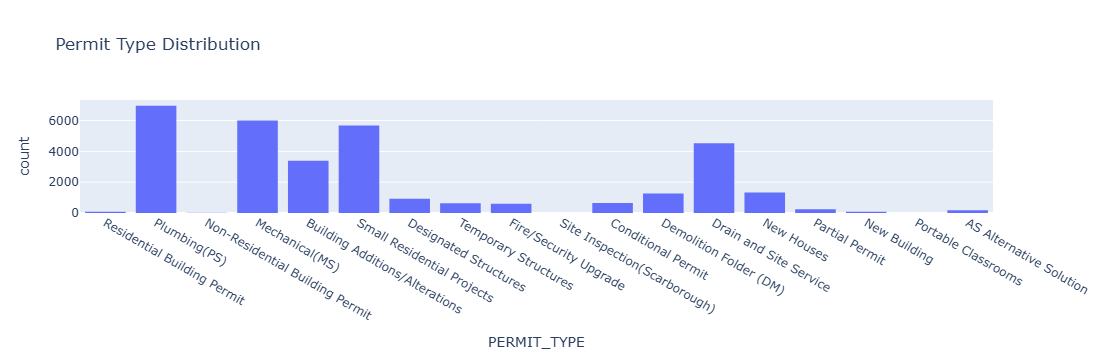

ValueError: Value of 'y' is not the name of a column in 'data_frame'. Expected one of ['PERMIT_NUM', 'REVISION_NUM', 'PERMIT_TYPE', 'STRUCTURE_TYPE', 'WORK', 'STREET_NUM', 'STREET_NAME', 'STREET_TYPE', 'STREET_DIRECTION', 'POSTAL', 'GEO_ID', 'WARD_GRID', 'APPLICATION_DATE', 'ISSUED_DATE', 'COMPLETED_DATE', 'STATUS', 'DESCRIPTION', 'CURRENT_USE', 'PROPOSED_USE', 'DWELLING_UNITS_CREATED', 'DWELLING_UNITS_LOST', 'EST_CONST_COST', 'ASSEMBLY', 'INSTITUTIONAL', 'RESIDENTIAL', 'BUSINESS_AND_PERSONAL_SERVICES', 'MERCANTILE', 'INDUSTRIAL', 'INTERIOR_ALTERATIONS', 'DEMOLITION', 'LATITUDE', 'LONGITUDE', 'Autoencoder_Anomaly'] but received: ESTIMATED_COST

In [20]:

# 📊 Interactive dashboard example
import plotly.express as px

fig = px.histogram(df, x="PERMIT_TYPE", title="Permit Type Distribution")
fig.show()

fig = px.scatter(df, x="APPLICATION_DATE", y="ESTIMATED_COST", color="PERMIT_TYPE",
                 title="Cost Over Time by Permit Type")
fig.show()


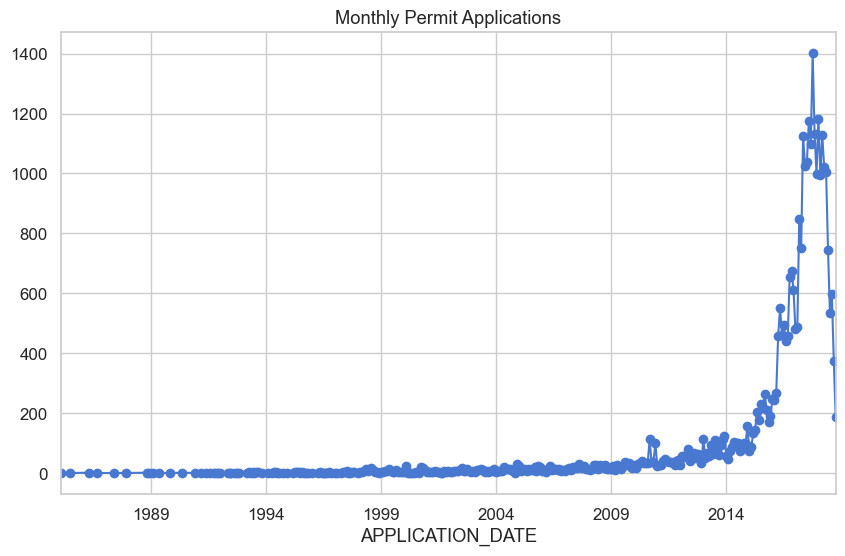

In [21]:

# 📅 Time-series trends
df["APPLICATION_DATE"] = pd.to_datetime(df["APPLICATION_DATE"], errors="coerce")
monthly_counts = df.groupby(df["APPLICATION_DATE"].dt.to_period("M")).size()

monthly_counts.plot(kind="line", marker="o", title="Monthly Permit Applications")
plt.show()
